# Rewriting TransferFuncList

In [1]:
%load_ext autoreload
import sys
sys.path.append("../..")

In [23]:
%autoreload

import matplotlib
matplotlib.rc_file('matplotlibrc')
import matplotlib.pyplot as plt

%matplotlib inline

matplotlib.rcParams['figure.figsize'] = [10,10]

# SET THIS TO TRUE TO USE LATEX
matplotlib.rcParams['text.usetex'] = False

from astropy.io import fits

import numpy as np
import copy
import pickle

import darkhistory.physics as phys
import darkhistory.utilities as utils
import darkhistory.spec.spectools as spectools
import darkhistory.spec.transferfunction as tf
import darkhistory.spec.transferfunclist as tflist
from darkhistory.spec.spectrum import Spectrum
from darkhistory.spec.spectra import Spectra
import darkhistory.history.tla as tla

from scipy.interpolate import interp1d
from scipy.interpolate import interp2d

from tqdm import tqdm_notebook as tqdm

from darkhistory.electrons.ics.ics_spectrum import ics_spec
from darkhistory.electrons.ics.ics_engloss_spectrum import engloss_spec
from darkhistory.electrons.ics.ics_cooling import get_ics_cooling_tf

from darkhistory.low_energy.lowE_deposition import compute_fs
import main

from tqdm import tqdm_notebook as tqdm

np.set_printoptions(threshold=np.nan)

In [24]:
standard_tfs = False
direc = '/Users/hongwan/Dropbox (MIT)/Photon Deposition/tfs_full_xHe/'
string = 'full_xHe'

highengphot_tflist_arr = pickle.load(open(direc+'tfunclist_photspec_60eV_complete_'+string+'.raw', 'rb'))

xes = 0.5 + 0.5*np.tanh(
    np.array(
        [-5.0, -2.3, -0.5, 0.0, 0.4, 2.2, 4.0]
    )
)

x_arr = np.array([[[xH, xHe] for xHe in xes] for xH in xes])

# True if you would like to subtract the CMB off of the transfer functions?
# CMB_subtracted=True

    
# string_arr = ["_xHe0"]
    
# for ii, string in enumerate(string_arr):
#     print('Loading transfer functions...')
#     highengphot_tflist_arr = pickle.load(open(direc_arr[ii]+"tfunclist_photspec_60eV_complete"+string+".raw", "rb"))
#     print('Loaded high energy photons...')

#     lowengphot_tflist_arr  = pickle.load(open(direc_arr[ii]+"tfunclist_lowengphotspec_60eV_complete"+string+".raw", "rb"))
#     print('Low energy photons...')

#     lowengelec_tflist_arr  = pickle.load(open(direc_arr[ii]+"tfunclist_lowengelecspec_60eV_complete"+string+".raw", "rb"))
#     print('Low energy electrons...')

#     highengdep_arr = pickle.load(open(direc_arr[ii]+"highdeposited_60eV_complete"+string+".raw", "rb"))
#     highengdep_arr = np.swapaxes(highengdep_arr, 1, 2)
#     print('high energy deposition.\n')

#     CMB_engloss_arr = pickle.load(open(direc_arr[ii]+"CMB_engloss_60eV_complete"+string+".raw", "rb"))
#     CMB_engloss_arr = np.swapaxes(CMB_engloss_arr, 1, 2)
#     print('CMB losses.\n')

In [25]:
test = tflist.TransferFuncListArray(highengphot_tflist_arr, x_arr)

In [28]:
test._grid_vals.shape

(7, 7, 20, 327, 500)

In [14]:
A[1]

[1, [3, 4]]

In [23]:
a = 2
a.ndim

AttributeError: 'int' object has no attribute 'ndim'

In [31]:
b = [3, 3, 3]
def square(x):
    return [y**2 for y in x]
square(x for x in b)

[9, 9, 9]

In [18]:
set([np.array([3, 4]), np.array([3, 4])])

TypeError: unhashable type: 'numpy.ndarray'

[]

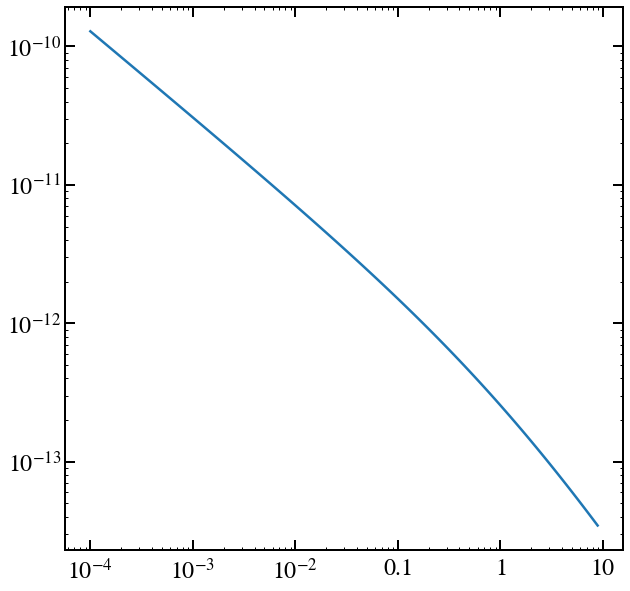

In [36]:
plt.figure()

T = 10**np.arange(-4, 1, 0.05)

plt.plot(T, phys.alpha_recomb(T))
ax = plt.gca()
ax.loglog()

[]

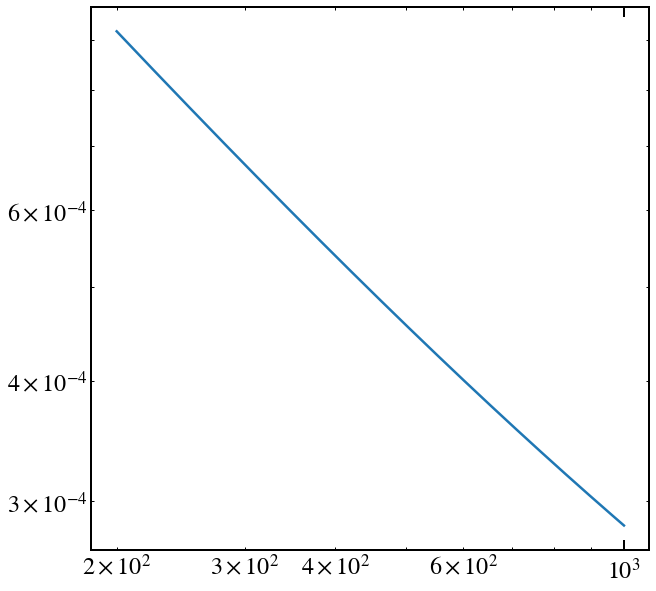

In [41]:
rs = np.arange(200, 1000)

plt.figure()

plt.plot(rs, phys.hubble(rs)/(phys.nH*rs**3*phys.alpha_recomb(phys.TCMB(rs))))

ax = plt.gca()
ax.loglog()